In [1]:
% matplotlib inline

import numpy as np
import scipy as sp
import math
import scipy.stats as scp
import matplotlib as mpl
from numpy import linalg as la
from numpy import random as rand
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.metrics import mean_squared_error

In [45]:
Data = np.genfromtxt("TrainingRidge.csv", delimiter=',', skip_header=True,dtype='float').T

X = Data[0:2,:].T
Y = Data[2,:][np.newaxis,:].T

Valid = np.genfromtxt("ValidationRidge-Y.csv", delimiter=',', skip_header=True,dtype='float').T

Xvalid = Valid[0:2,:].T
Yvalid = Valid[2,:][np.newaxis,:].T

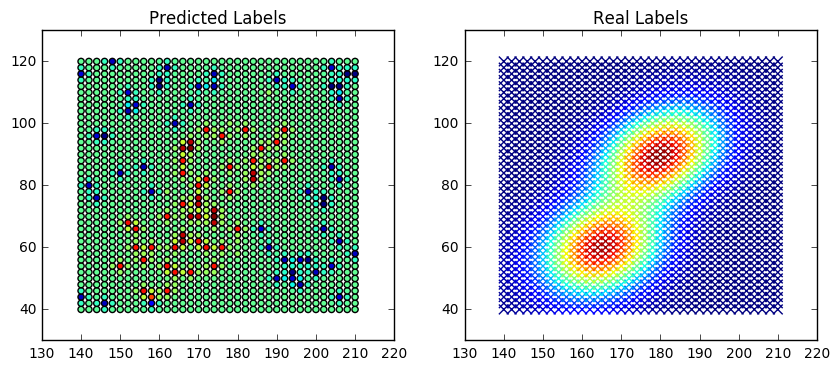

In [49]:
# train
nsvm = svm.NuSVR(kernel='rbf',nu=0.5)
nsvm.fit(X,Y)

#predict 
pred_y = nsvm.predict(Xvalid)
pred_y.astype(int)

fig = plt.figure()
fig.set_size_inches(10,4)
plt.subplot(121)
plt.scatter(Xvalid[:,0],Xvalid[:,1], c=pred_y )
plt.title('Predicted Labels')
plt.subplot(122)
plt.scatter(Xvalid[:,0],Xvalid[:,1], c=Yvalid, marker = 'x', s = 50 )
plt.title('Real Labels')
plt.show()


In [50]:
def cross_valid(X, y, g,c, n_folds=10, nu=0.5):
    '''
    Synopsis:
        w_opt, b_opt, lambda_opt = cross_validation(X, Y, L, n_folds=10)
    Arguments:
        X:            2D array of data (features x samples)
        Y:            Vector of true labels (1 x samples)
        L:            List of lambdas to cross validate (1 x #lambdas)
        n_folds:      Number of nested folds
    Output:
        w_opt:        optimal weight vector
        b_opt:        optimal bias
        lambda_opt:   the lambda with the lowest MSE
    '''
    X = X.T
    y = y.T
    d, n = X.shape
    samples_per_fold = int(float(n)/ float(n_folds))

    rates = np.empty(n_folds)
    idx = np.arange(n) # np.random.permutation(n) # np.arange(n)
    for j in range(n_folds):
        # extract one fold for testing
        idx_te = idx[j*samples_per_fold:(j+1)*samples_per_fold]
        # get the train data
        X_tr = np.delete(X, idx_te, axis=1)
        y_tr = np.delete(y, idx_te, axis=1)
        # get the test data
        X_te = X[:,idx_te]
        y_te = y[:,idx_te]

        
        # train the model
        c_svm = svm.NuSVR(kernel='rbf',nu=nu,gamma = g,C = c)
        c_svm.fit(X_tr.T,y_tr.T)
        # predict the label
        y_pred = c_svm.predict(X_te.T)
        rates[j] = mean_squared_error(y_te.T,y_pred)
       
    return np.min(rates)

In [73]:
C = 2.**np.arange(-2,12,1)
gamma = 2.** np.arange(-12,0,1)
nu = 0.5

mse = np.zeros((gamma.shape[0],C.shape[0]))

for j,g in enumerate(gamma):
    for i, c in enumerate(C):
        mse[j][i] = cross_valid(X,Y,g,c)


        

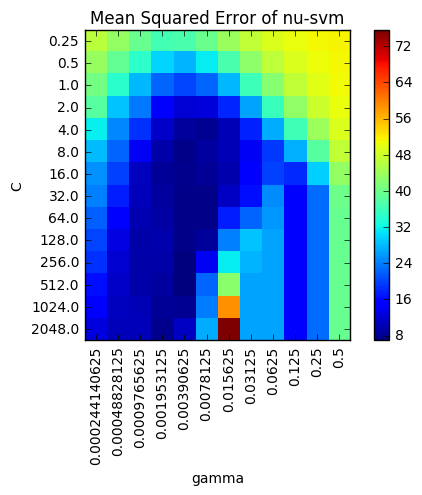

In [102]:
plt.imshow(mse.T, interpolation='nearest')
plt.colorbar()
plt.title("Mean Squared Error of nu-svm")
plt.xlabel("gamma")
plt.ylabel("C")
plt.xticks(np.arange(gamma.shape[0]),gamma, rotation = "vertical")
plt.yticks(np.arange(C.shape[0]),C, rotation = "horizontal")
plt.show()

In [99]:
# find best combination of C and gamma
idx_g, idx_c = (np.unravel_index(mse.argmin(), mse.shape))
opt_g = gamma[idx_g]
opt_c = C[idx_c]

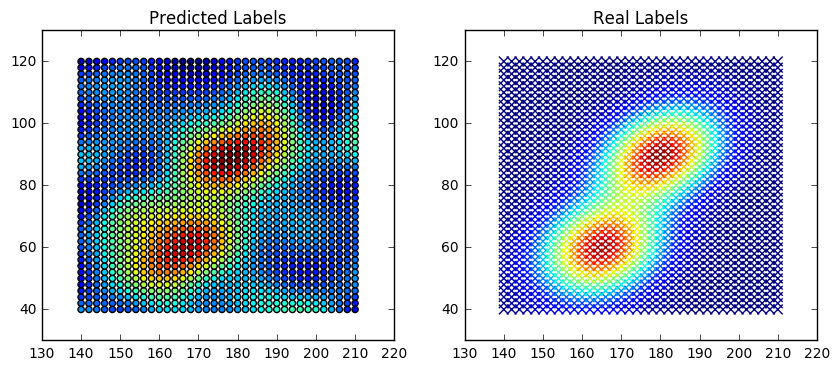

In [103]:
opt_svm = svm.NuSVR(kernel='rbf',nu=0.5,gamma = opt_g,C = opt_c)
opt_svm.fit(X,Y)

#predict 
opt_y = opt_svm.predict(Xvalid)

fig = plt.figure()
fig.set_size_inches(10,4)
plt.subplot(121)
plt.scatter(Xvalid[:,0],Xvalid[:,1], c=opt_y )
plt.title('Predicted Labels')
plt.subplot(122)
plt.scatter(Xvalid[:,0],Xvalid[:,1], c=Yvalid, marker = 'x', s = 50 )
plt.title('Real Labels')
plt.show()